In [1]:
%load_ext autoreload
%autoreload 2
from main.aims.aim1_1_taxonomy.utils_taxonomy import *

/home/artinmajdi/miniconda3/envs/datascience_py310/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/artinmajdi/miniconda3/envs/datascience_py310/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2023-04-25 19:31:34.157277: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Figure

###  Graph

In [ ]:
# AIM1_1_TorchXrayVision.check(check_what='show_graph', package='plotly')

# TODO: Check if the simulations are ran for AP or PA. if it works on both, maybe i can run it on both views simulataneously

### ROC Curves

In [ ]:
# aim1_1 = AIM1_1_TorchXrayVision.run_full_experiment(approach='logit', dataset_name='CheX')
# aim1_1.visualize(data_mode='test', thresh_technique='default').plot_roc_curves()

In [ ]:
Visualize.loop(experiment='roc_curve')

### UMAP Visualization

### Relationship between different classes

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

  0%|          | 0/3 [00:00<?, ?it/s]

/home/artinmajdi/miniconda3/envs/datascience_py310/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/artinmajdi/miniconda3/envs/datascience_py310/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
 53%|█████▎    | 10/19 [00:19<00:17,  1.97s/it]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


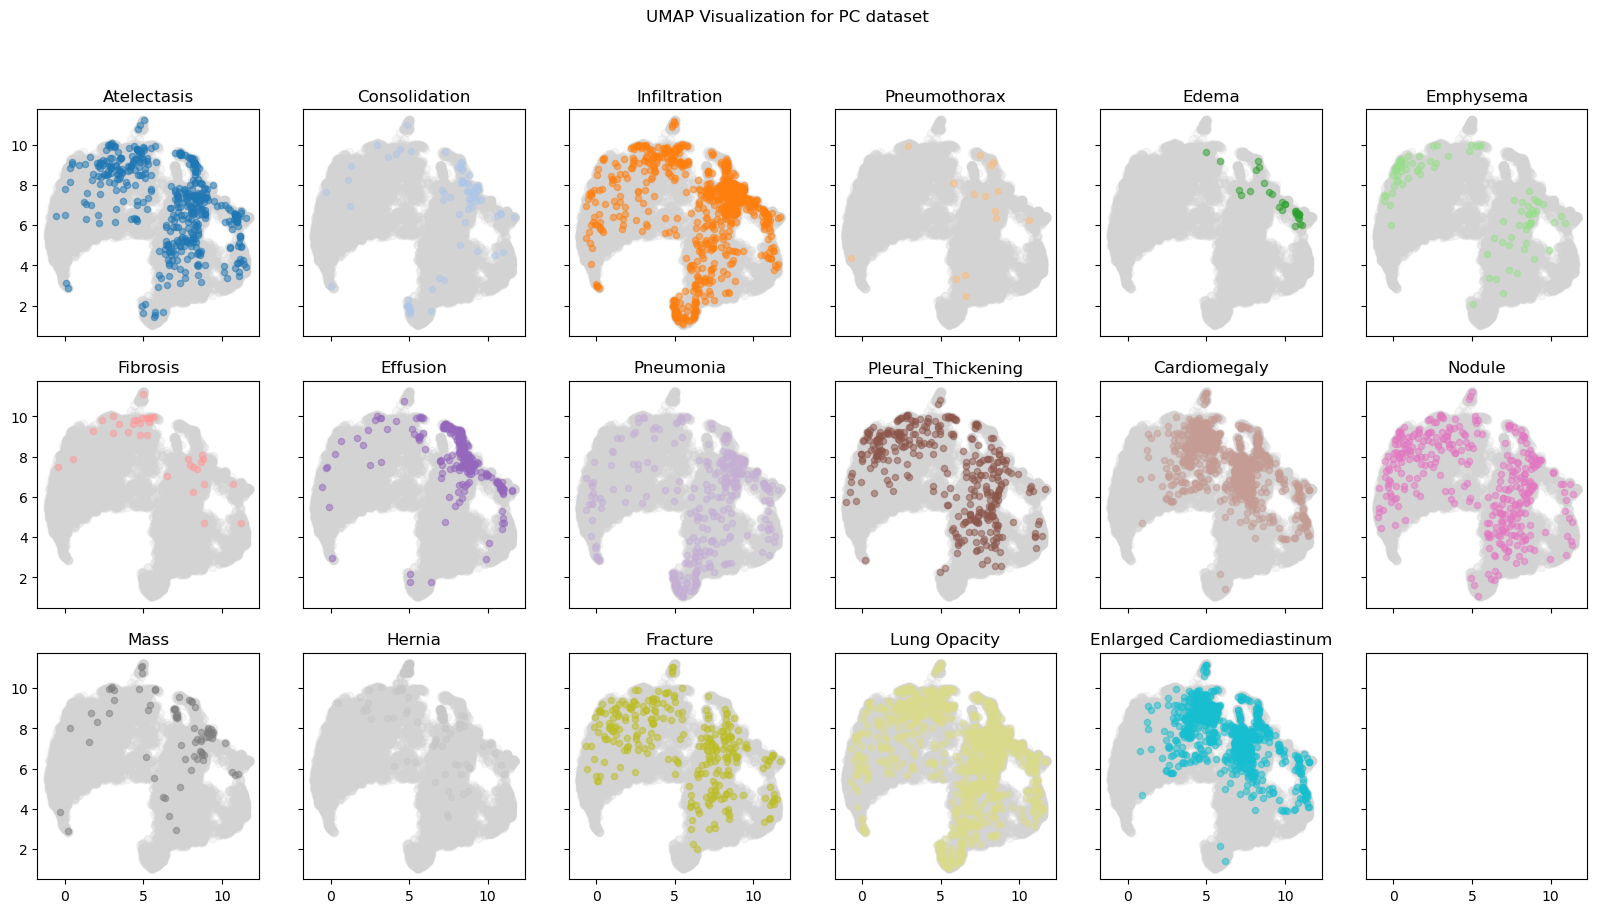

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


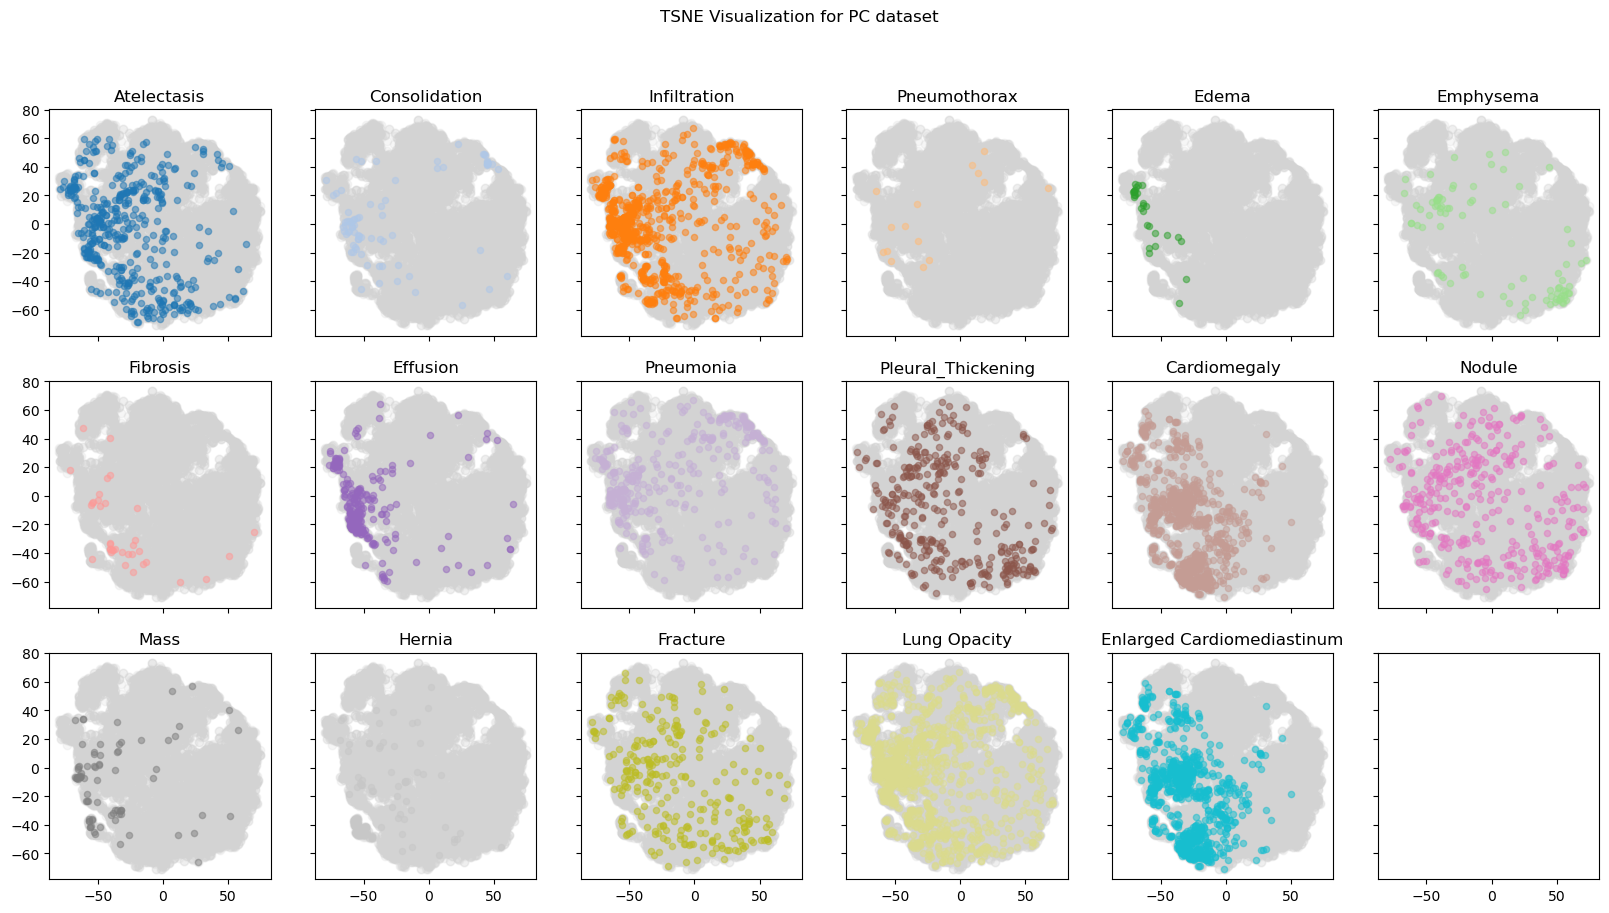

/home/artinmajdi/miniconda3/envs/datascience_py310/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/artinmajdi/miniconda3/envs/datascience_py310/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
100%|██████████| 10/10 [00:12<00:00,  1.24s/it]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


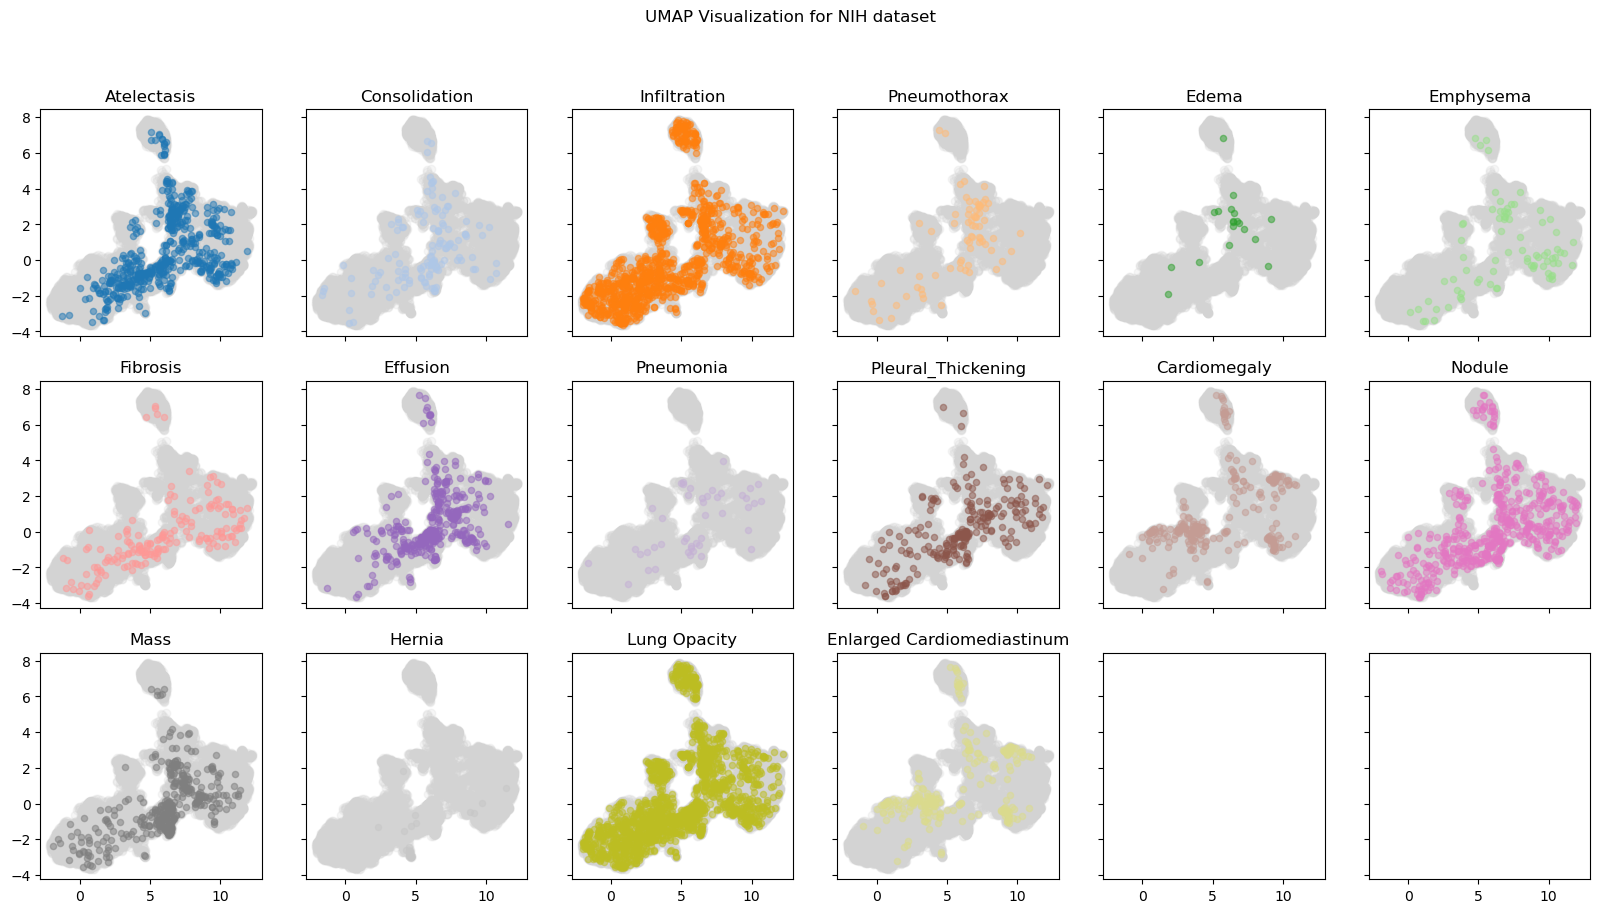

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


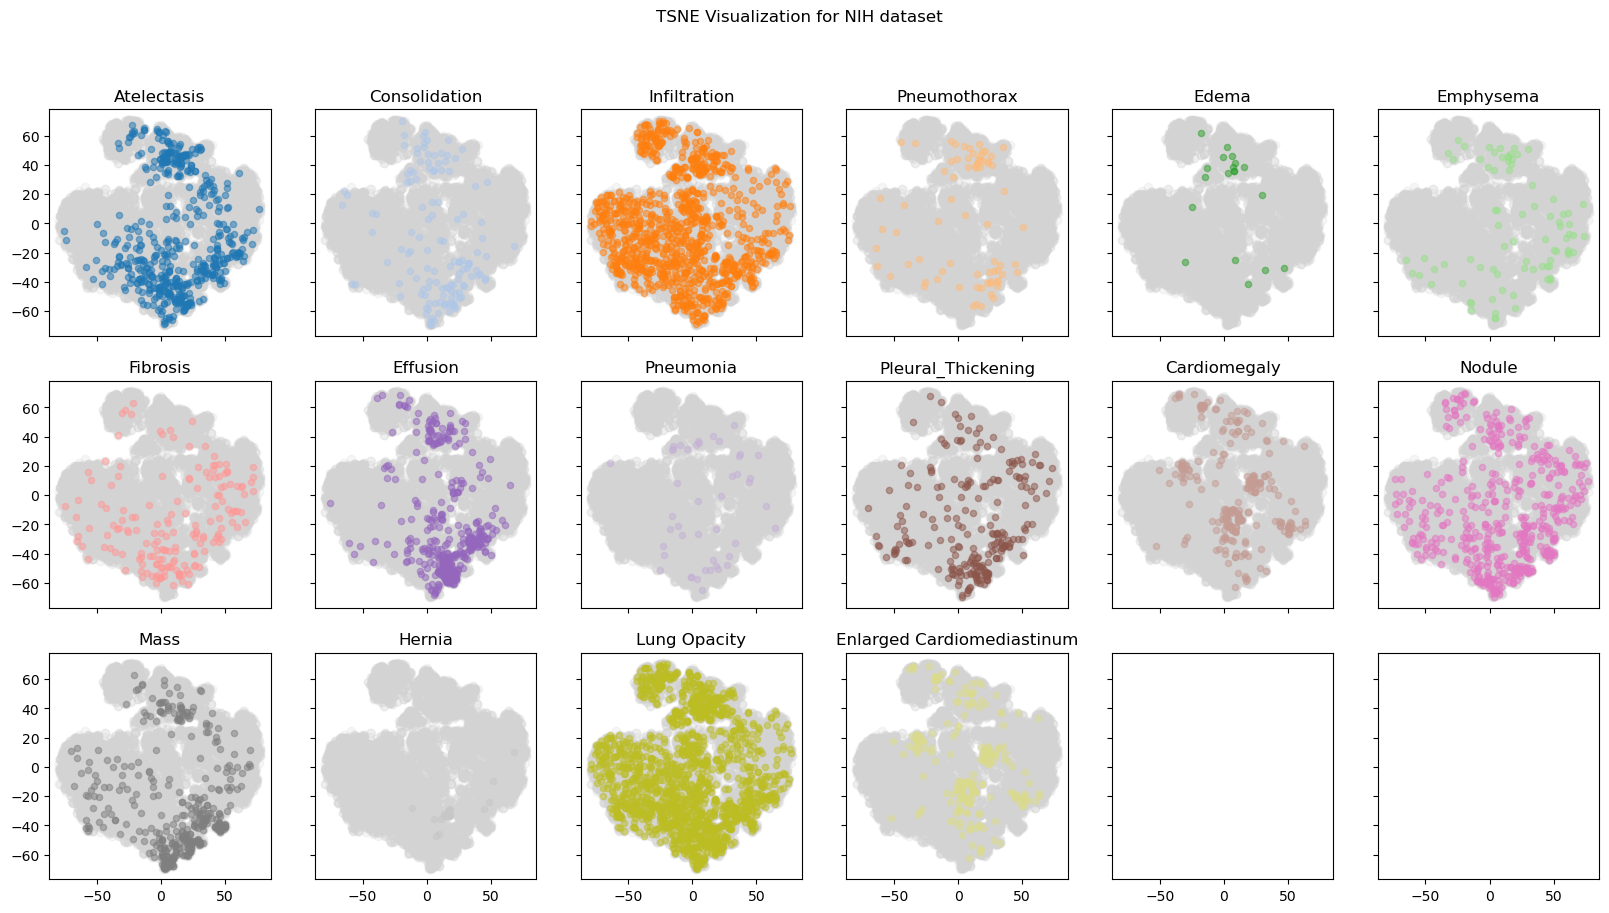

/home/artinmajdi/miniconda3/envs/datascience_py310/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/artinmajdi/miniconda3/envs/datascience_py310/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
100%|██████████| 5/5 [00:13<00:00,  2.71s/it]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


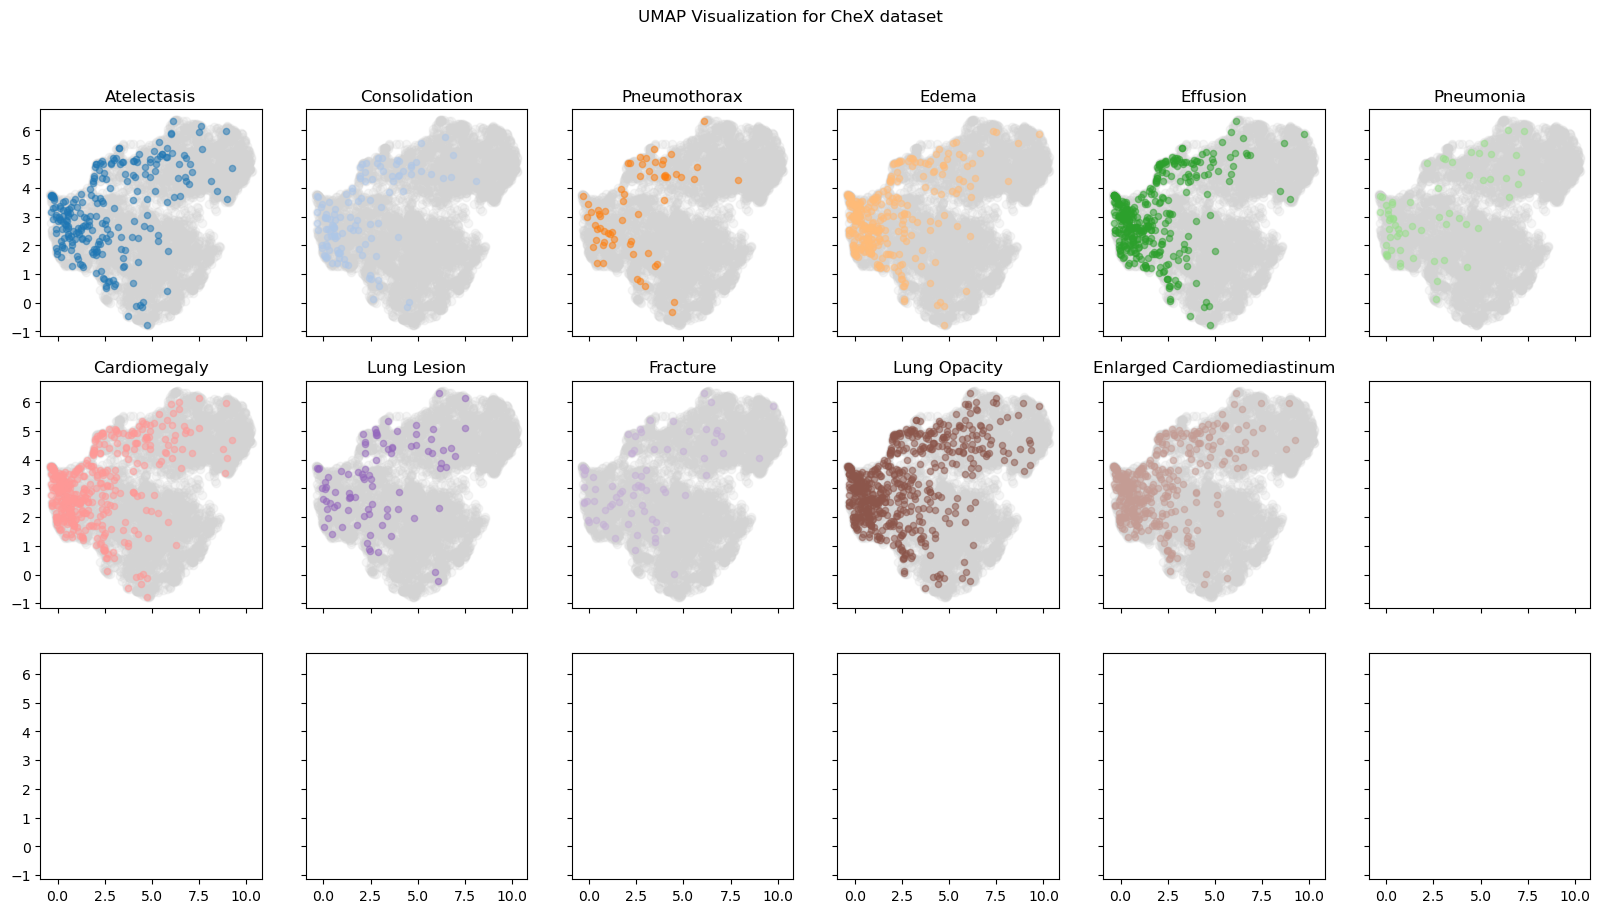

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


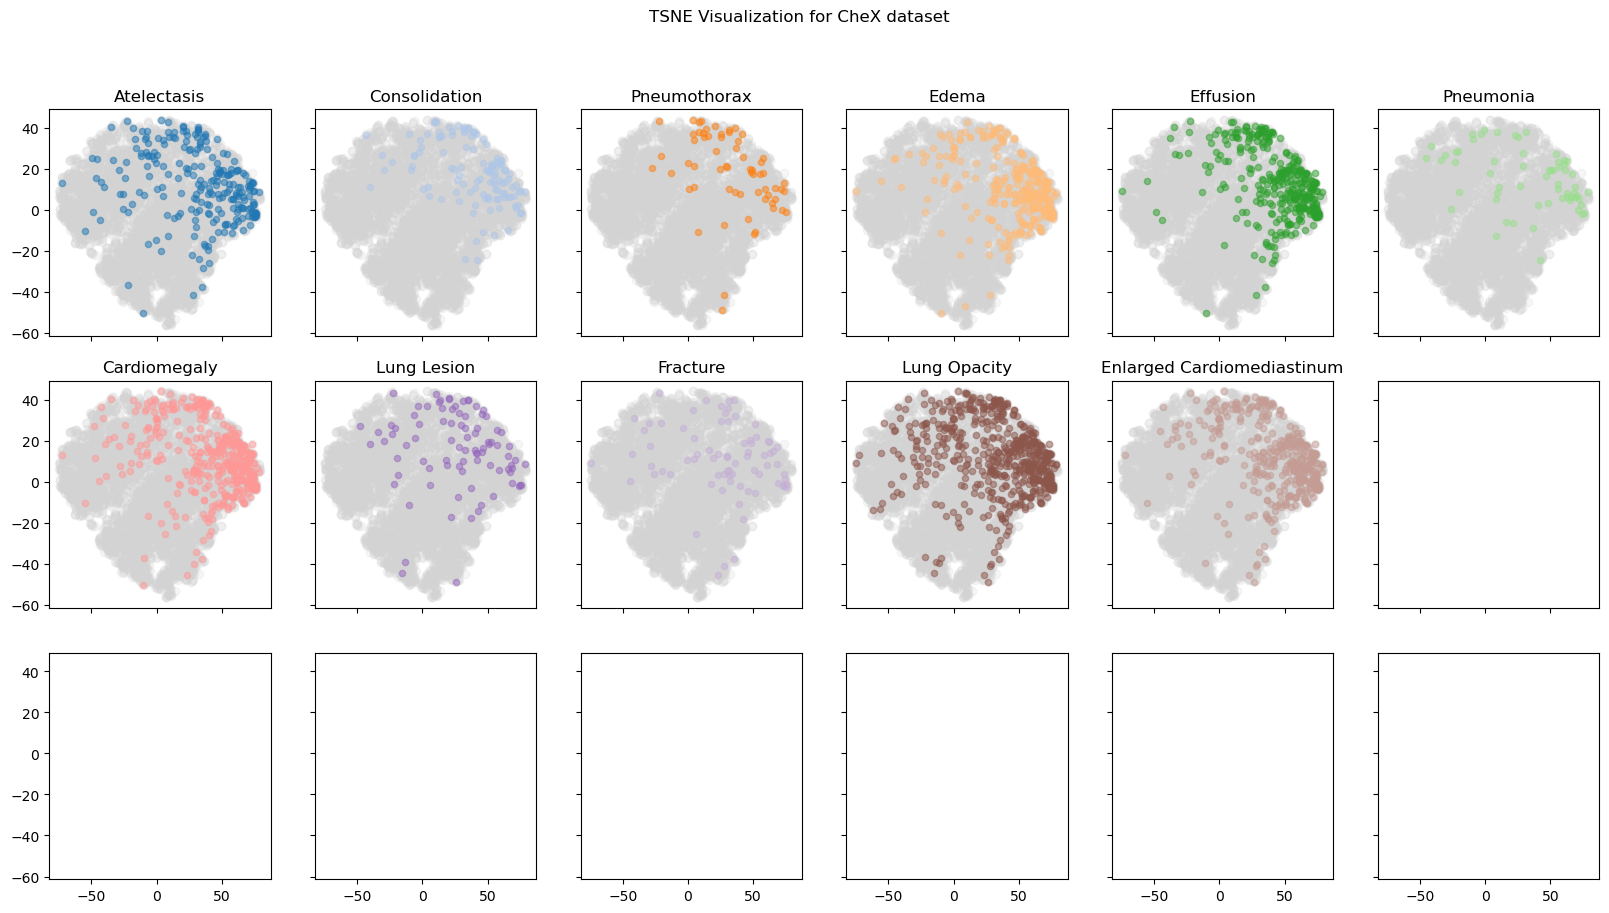

In [4]:
Visualize.loop(experiment='class_relationship', data_mode='test')

In [ ]:
# features, X_embedded  = Visualize.umap_visualization(data_mode='test', dataset_name='NIH')

In [ ]:
# Assuming 'y' is a NumPy array containing the class labels (0-17) for all samples in your dataset
# Assuming 'intermediate_output' is the activations from the 1024-node layer

class_activations = []

for class_label in range(18):  # Replace '18' with the number of classes in your dataset
    class_indices = np.where(y == class_label)
    class_samples_activations = intermediate_output[class_indices]
    class_average_activation = np.mean(class_samples_activations, axis=0)
    class_activations.append(class_average_activation)

class_activations = np.array(class_activations)

In [ ]:

# Create the linkage matrix
linkage_matrix = linkage(labels.astype(int).to_numpy(), method='ward')

In [ ]:
linkage_matrix.shape

In [ ]:
# Plot the dendrogram
plt.figure()
dendrogram(linkage_matrix, labels=labels.columns)
plt.show()

In [ ]:
# Calculate the distance or similarity matrix between the classes
# One option is to use cosine similarity, Jaccard similarity, or another metric based on your requirements

# features, truth, index, LD = CalculateOriginalFindings.get_feature_maps(data_mode='test', dataset_name='CheX')


In [ ]:


X_normalized = normalize(features)
similarity_matrix = np.dot(X_normalized, X_normalized.T)

# Perform hierarchical clustering
linked = linkage(similarity_matrix, method='ward')

# Create a dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', labels=index, distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Tables

### Datasets n_samples

In [ ]:
df = Tables().get_table1_PA_AP(save_table=True)
df
# make sure to explain Total in the caption

### Metrics: AUC, F1, ACC

In [ ]:
# Tables().loop_table2()

In [ ]:
metrics = Tables().get_table2_metrics_all_datasets_approaches(save_table=True, data_mode='test', threshold_technique='default')
metrics.auc

### statistical t-test

In [ ]:
import researchpy as rp

aim1_1 = AIM1_1_TorchXrayVision.run_full_experiment(approach='logit', dataset_name='CheX')

In [ ]:
import researchpy as rp
import numpy as np
from scipy import stats


thresh_technique = 'default'
pred1 = aim1_1.test.ORIGINAL.pred
pred2 = aim1_1.test.NEW.pred[thresh_technique]

th1 = aim1_1.test.ORIGINAL.metrics[thresh_technique].loc['Threshold']
th2 = aim1_1.test.NEW     .metrics[thresh_technique].loc['Threshold']

In [ ]:
aim1_1.get_metric(metric='ACC', data_mode='test')

In [ ]:
node = aim1_1.test.labels.list_nodes_impacted[0]
node

In [ ]:
# Perform the independent samples t-test
t_stat, p_value = stats.ttest_ind( pred1[node] >= th1[node], pred2[node] >= th2[node])

# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)

In [ ]:
y1 = (pred1[node] >= th1[node]).reset_index(drop=True) 
y2 = (pred1[node] >= th1[node]).reset_index(drop=True) 

# rp.ttest(group1=y1, group1_name='baseline', group2=y2, group2_name='proposed')


import researchpy as rp


# # Perform the independent samples t-test
# t_test_results = rp.ttest(group1=y1.iloc[:, 0], group1_name='baseline', 
#                           group2=y2.iloc[:, 0], group2_name='proposed', 
#                           equal_variances=True)

# # Print the t-test summary
# print(t_test_results)

y1.append(y2, ignore_index=True)

In [ ]:

df_all_temp = self.accuracy_stacked.groupby(['strategy','method', 'dataset_name'])

results_all = pd.DataFrame()
path = 'results/tables/ttest/freq_vs_beta_for_proposed_penalized.csv'

for dataset_name in self.datasets_names.values():

    df1  = df_all_temp.get_group(('freq' , 'proposed_penalized' , dataset_name)).accuracy.rename('freq')
    df2  = df_all_temp.get_group(('beta' , 'proposed_penalized' , dataset_name)).accuracy.rename('beta')
_, results = rp.ttest(df1, df2)

results_all[dataset_name] = results.set_index('Independent t-test').rename(columns={'results':dataset_name})



# Metrics

In [ ]:
# aim1_1 = AIM1_1_TorchXrayVision.run_full_experiment(approach='logit', dataset_name='PC')
# aim1_1.get_metric(metric='AUC', data_mode='test')

In [4]:
import matplotlib.pyplot as plt 

directory = '/Users/personal-macbook/Documents/code/main/aims/aim1_1_taxonomy/taxonomy-paper/images/image1.png'
im = plt.imread(directory)

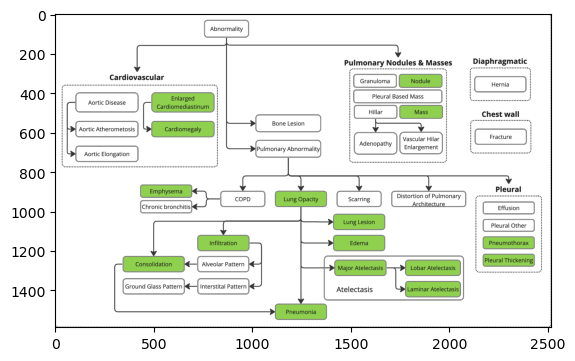

In [6]:
plt.imshow(im)